유니콘 기업 찾기

유니콘 기업은 어떤 기업인지 (어떤 기준으로 근거를 내릴건지)<br>
DB 데이터 EDA (나중에 발표에 쓰일 시각화 포함)<br>
결론

# import

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정

# 데이터 불러오기

In [3]:
data = pd.read_csv('company_nps_data.csv', encoding='CP949')
df = data.copy()
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


99,801개 데이터가 있다.<br>
특성은 6개. 회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수



- 결측값, 중복값 확인
- 컬럼별 EDA <br>
- 년도,월 데이터가 있는데 정렬이 되어있지 않다 -> 시간순 정렬 <br>
- 같은 회사ID 데이터도 흩어져있다 -> 회사ID  정렬

# EDA&전처리
## 결측값,중복값

In [4]:
#데이터 결측치,유형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [5]:
#중복값 확인
df.duplicated().sum()

0

결측값,중복값 없음<br>
데이터 유형은 모두 int

## 특성별 EDA
### 회사ID

In [6]:
df['회사ID'].value_counts()

155754     50
237625     50
296819     50
395238     50
442525     50
           ..
2256869     1
573311      1
317847      1
440452      1
1983879     1
Name: 회사ID, Length: 5000, dtype: int64

회사 수 5000개<br>
회사별 데이터 최대 : 50<br>
회사별 데이터 최소 : 1<br>

In [9]:
# 많은 데이터를 갖고 있는 회사 수, 적은 데이터를 갖고 있는 회사 수 시각화
df_데이터수_count = pd.DataFrame(pd.DataFrame(df['회사ID'].value_counts())['회사ID'].value_counts()).reset_index().rename(columns={'회사ID':'회사수','index':'데이터수'})

In [10]:
df_데이터수_count.sort_values(by='데이터수').head()

,데이터수,회사수
12,1,39
6,2,239
16,3,30
13,4,35
15,5,32


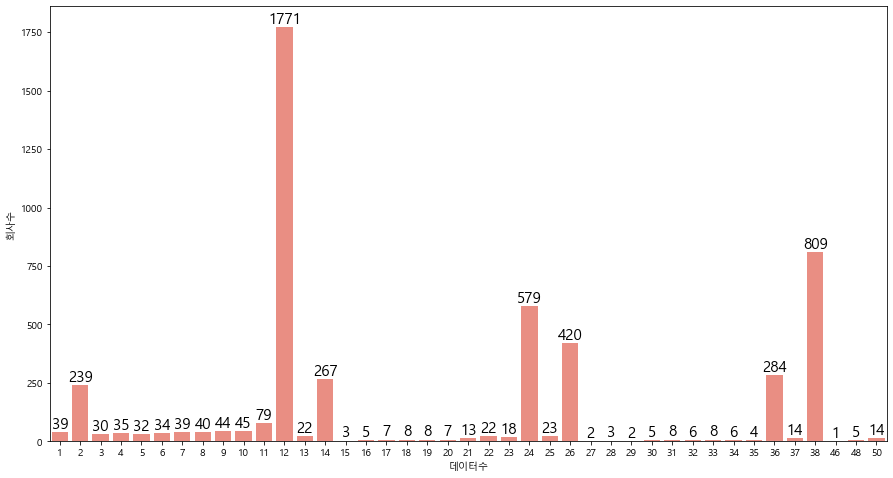

In [11]:
plt.figure(figsize = (15,8))

plots = sns.barplot(data=df_데이터수_count, x="데이터수", y="회사수",color="salmon")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

전체기간에 데이터를 갖고 있는 회사는 극히 드물고 30개 이상의 많은 데이터를 갖고 있는 회사도 1000개가 넘지만 절반정도는 10개 내외 그이하의 데이터를 갖고 있다.<br>
40개이상 데이터는 0인 경우도 많다.

### 연매출액

In [12]:
pd.options.display.float_format = '{:.5f}'.format #지수표현 없이 출력하기
df['연매출액'].describe()

count         99801.00000
mean       30535893.43424
std       301664669.02473
min        -7882176.00000
25%         1409760.00000
50%         3573585.00000
75%         9582321.00000
max     11328779396.00000
Name: 연매출액, dtype: float64

In [13]:
df[df['연매출액']<0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
7516,432911,-7882176,2017,5,2042620,6
7617,432911,-7882176,2017,10,1687760,5
8595,432911,-7882176,2017,1,2042620,6
23150,432911,-7882176,2017,7,2091860,6
36048,432911,-7882176,2017,2,2042620,6
37489,432911,-7882176,2017,11,1687760,5
51605,432911,-7882176,2017,6,2042620,6
56276,432911,-7882176,2017,4,2042620,6
64094,432911,-7882176,2017,3,2042620,6
67889,432911,-7882176,2017,12,1687760,5


매출액이 '-'라니 잘못입력된 값인 것 같다.

In [22]:
# 음수값 양수값으로 변경
df['연매출액']=abs(df['연매출액'])

In [23]:
df[df['연매출액']<0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수


In [59]:
#연도별 연매출액 데이터 수
df_2 = df.drop_duplicates(subset=['회사ID', '연매출액'], keep='last')  #회사 연매출액 중복제거
df_2.groupby('년도').count()[['회사ID']]

,회사ID
년도,
2015,1827
2016,3212
2017,1504
2018,3494
2019,74


<연도별 연매출액 데이터 수>
<BR>
2015년: 	1827<BR>
2016년:	3212<BR>
2017년:	1504<BR>
2018년:	3494<BR>
2019년:	74

### 년도,월

In [24]:
df['년도'].unique()

array([2018, 2015, 2016, 2017, 2019], dtype=int64)

In [25]:
df[df['년도']==2015]['월'].min()

11

In [26]:
df[df['년도']==2019]['월'].max()

12

데이터는 2015년 11월 부터 2019년 12월 까지의 데이터이다. 50개월이다

In [27]:
df['시기'] = df["년도"].astype(str)+"-"+df["월"].astype(str)
df["시기"] = pd.to_datetime(df["시기"]).dt.strftime("%Y-%m")

df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시기
0,233757,41688077,2018,7,8912380,36,2018-07
1,123464,1760695,2018,3,942380,5,2018-03
2,342124,3221341,2018,7,781180,4,2018-07
3,386420,4815584,2015,11,3795900,14,2015-11
4,129243,9799736,2018,10,40724680,151,2018-10
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02
99797,239388,1045021,2018,10,1428800,9,2018-10
99798,272304,181898,2018,3,392560,4,2018-03
99799,362194,2100218,2018,12,874780,3,2018-12


In [28]:
df_시기_count = pd.DataFrame(df['시기'].value_counts()).reset_index().sort_values(['index'])
df_시기_count.head()

,index,시기
25,2015-11,1760
24,2015-12,1826
23,2016-01,3102
22,2016-02,3121
21,2016-03,3126


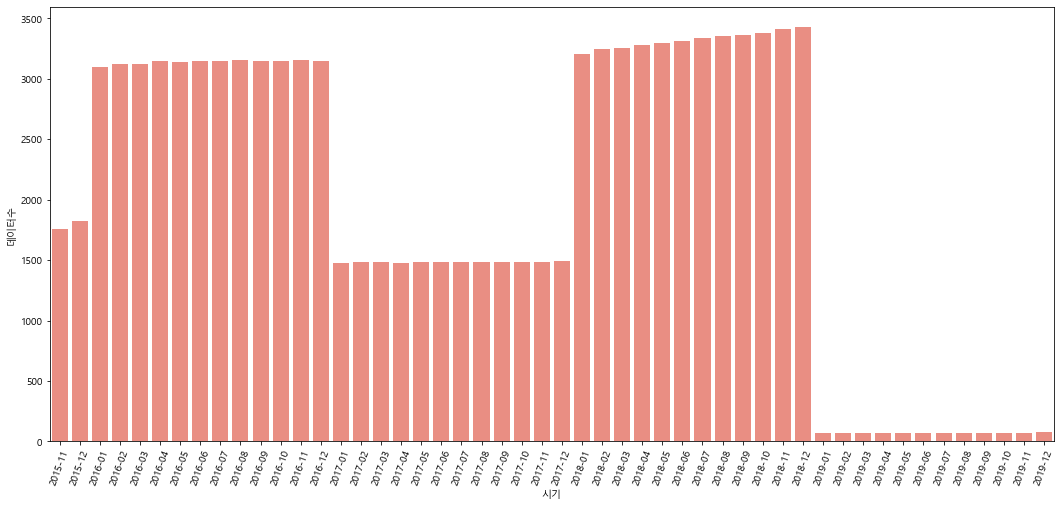

In [29]:
plt.figure(figsize = (18,8))
ax = sns.barplot(data=df_시기_count, x='index', y="시기",color="salmon")
ax.set(xlabel='시기', ylabel='데이터수')
plt.xticks(rotation=70)

plt.show()

2019년 부터는 데이터가 없는 회사들이 대부분인 것 같다. 2016년과 2018년에 데이터가 많았다. 

### 월별 연금보험료

In [30]:
df['월별_연금보험료'].describe()

count       99801.00000
mean      9734079.21404
std      43472560.16741
min             0.00000
25%       1181160.00000
50%       2332760.00000
75%       5591860.00000
max     978067260.00000
Name: 월별_연금보험료, dtype: float64

### 월별 직원수

In [31]:
df['월별_직원수'].describe()

count   99801.00000
mean       37.62343
std       146.94719
min         0.00000
25%         6.00000
50%        11.00000
75%        24.00000
max      3133.00000
Name: 월별_직원수, dtype: float64

## feature 상관관계

In [32]:
# 연매출액, 월별 연금보험료, 월별 직원수 상관관계
df[['연매출액','월별_연금보험료','월별_직원수']].corr(method = 'pearson')

,연매출액,월별_연금보험료,월별_직원수
연매출액,1.00000,0.72969,0.63812
월별_연금보험료,0.72969,1.00000,0.96210
월별_직원수,0.63812,0.96210,1.00000


연금보험료는 직원수가 많은 곳에서 많이 나오고, 연매출액과도 어느정도 양의 상관관계가 있다

# 유니콘 기업 찾기

유니콘 기업 사전적 의미
- 유니콘 기업(Unicorn)은 기업 가치가 10억 달러(=1조 원) 이상이고 창업한 지 10년 이하인 비상장 스타트업 기업을 말한다.

기업가치 평가 참고
- 스타트업의 가치는 어떻게 측정할까(https://brunch.co.kr/@jyzz21/7)

국내 유니콘 기업
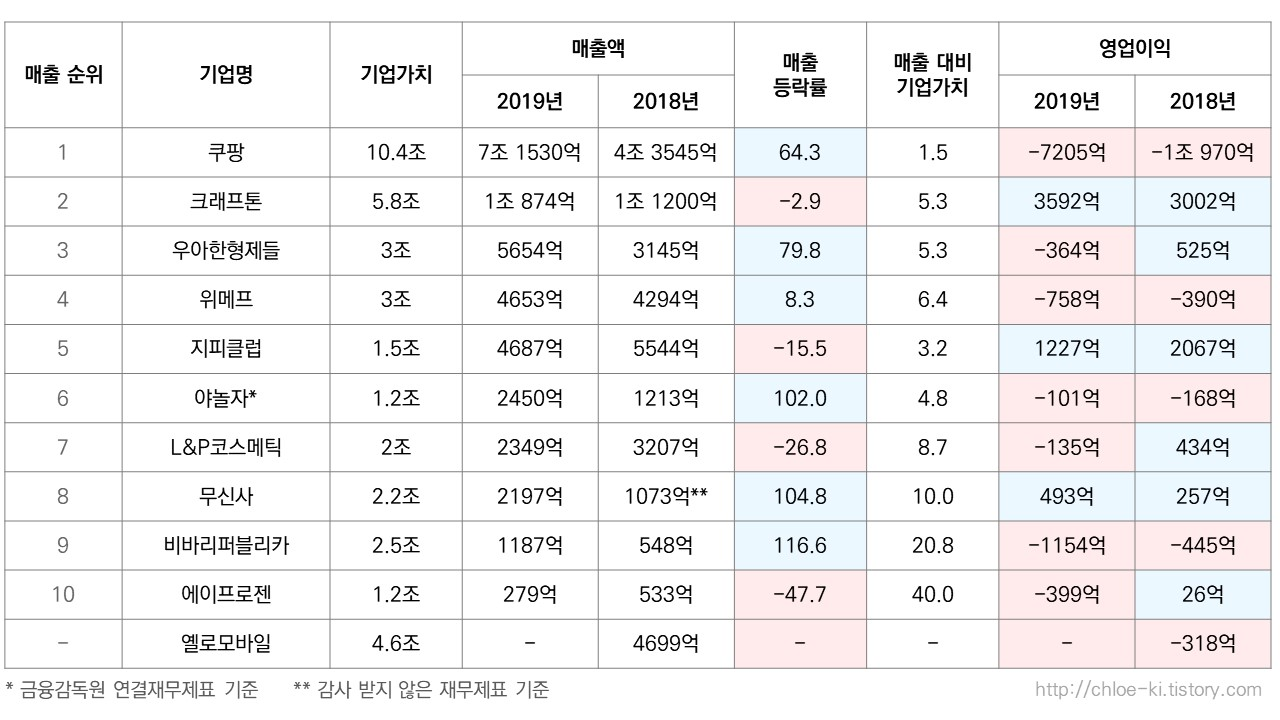

조건
- 높은 매출액<br>
    국내 유니콘 기업을 보면 매출액 대비 기업가치가 40배에 달하는 기업도 있지만, <br>매출액이 최소 100억단위는 되어야 여러가지 잠재가치평가로 유니콘 기업으로 볼 수 있을 것이다.
<br><br>
- 매출액,직원수 등 회사규모의 성장<br>
    일시적으로 성장이 꺾일 수 있지만 상승하는 성장세를 보여야 잠재가치를 인정받고 유니콘 기업으로 분류할 수 있을 것이다. <br><br>
- 높은 성장률<br>
    미미한 성장률보다는 높은 성장률을 보이는 기업이 미래가치를 더 인정받고 유니콘 기업으로 분류될 수 있을 것이다.


## 100억 이상의 연매출액을 보인 기업

In [93]:
#연도별 연매출액 순위
wide_df = df.pivot_table(index = '회사ID', columns = '년도', values = '연매출액',aggfunc='first')
# wide_df.reset_index(inplace=True)
wide_df


년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,nan,nan,nan,11328779396.00000,nan
95,nan,nan,nan,656947437.00000,nan
102,nan,nan,nan,742658938.00000,nan
295,nan,nan,nan,83776697.00000,nan
414,nan,nan,nan,19732769.00000,nan
...,...,...,...,...,...
2400284,nan,nan,nan,1263406.00000,nan
2437574,nan,nan,nan,214016.00000,nan
2693684,nan,nan,nan,nan,238076.00000


가장 최근 데이터 2019년 연매출액이 높은 회사(+2018년,데이터가 부족하므로)

In [94]:
wide_df[[2019]].sort_values(by=2019,ascending=False).head(10)

년도,2019
회사ID,
419945,10058868796.00000
294367,875661976.00000
420165,165961753.00000
128174,105847542.00000
130023,50504627.00000
442467,44059030.00000
155754,43590434.00000
440559,35826071.00000
305146,32791140.00000


2019년 연매출액 데이터에서 100억이상의 매출을 보이는 기업은 1개(419945) 이다.

In [72]:
wide_df[[2018]].sort_values(by=2018,ascending=False).head(10)

년도,2018
회사ID,
63,11328779396.00000
419945,8391469199.00000
227415,5521038494.00000
227414,4933525226.00000
419977,4157069000.00000
294649,4152465961.00000
419998,3512597764.00000
126831,2206140616.00000
381180,1618894425.00000


2019년의 기업데이터가 워낙적어서 2018년 데이터를 보니 100억이상 연매출액을 가진 기업이 1개 더 발견되었다.그래도 기업수가 부족하여 전체기간에 대하여 100억 이상의 연매출액을 보인 기업을 모두 찾아보았다.

In [74]:
df[df['연매출액']>10000000000]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시기
6086,419945,10058868796,2019,12,952530380,2872,2019-12
6449,63,11328779396,2018,6,401083100,1011,2018-06
13109,419945,10058868796,2019,4,870665760,2765,2019-04
23302,63,11328779396,2018,7,418169080,1009,2018-07
23648,63,11328779396,2018,10,414503020,996,2018-10
25614,419945,10058868796,2019,7,928921380,2762,2019-07
28110,63,11328779396,2018,5,400339640,1002,2018-05
33039,63,11328779396,2018,1,403119840,1006,2018-01
35822,419945,10058868796,2019,11,952045040,2870,2019-11
52606,63,11328779396,2018,8,418292620,1011,2018-08


월별로 데이터가 중복되어서 여러개가 출력되었다. 실제로 2018년과 2019년에 1개씩 발견한 기업외에 100억이상의 매출액을 보인 기업은 없는 것 같다.
 
두 기업이 매출액이 하락세이지는 않은지 확인해보았다.


In [98]:
wide_df.loc[[63,419945]]

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,nan,nan,nan,11328779396.00000,nan
419945,nan,7108279325.00000,7853891952.00000,8391469199.00000,10058868796.00000


회사ID = 63 은 100억이상 매출을 보였지만 2018년 1번뿐이라 성장세를 확인할 수 없는 것이 아쉽다.<BR>
회사ID = 419945 은 지속적인 매출액 성장세를 보이고 2019년 100억이상 매출액이 되었다.


## 높은 성장률

연매출액기준으로 보았을 때 유니콘 기업으로 분류할만한 기업이 많지는 않은 것 같다. 연매출액이 100억에 조금 미치지 못하더라도 매출액과 직원수 등 회사규모의 높은 성장세를 보이는 기업을 추가로 찾아보았다.


### 연매출액

2018년,2019년 데이터 기준으로 50억 이상의 매출액을 보인 기업들 중
이전 데이터 대비 높은 성장률을 보이는 기업을 찾아보았다.

In [104]:
wide_df[(wide_df[2019]>5000000000)|(wide_df[2018]>5000000000)] # 2018년,2019년 매출액이 50억 이상인 기업

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,nan,nan,nan,11328779396.00000,nan
227415,4961710828.00000,5093598465.00000,5387846478.00000,5521038494.00000,nan
419945,nan,7108279325.00000,7853891952.00000,8391469199.00000,10058868796.00000


2018년과 2019년에 50억이상의 매출액을 보인 기업으로 찾아보았을 때 1개 기업이 더 발견되었는데, 성장률이 크지 않다.

In [107]:
wide_df[(wide_df[2017]>5000000000)|(wide_df[2016]>5000000000)|(wide_df[2015]>5000000000)] # 2015년~2017년 매출액이 50억 이상인 기업

년도,2015,2016,2017,2018,2019
회사ID,,,,,
227415,4961710828.00000,5093598465.00000,5387846478.00000,5521038494.00000,nan
419945,nan,7108279325.00000,7853891952.00000,8391469199.00000,10058868796.00000


2015년~2017년 연매출액 데이터도 확인해보았으나 50억이상 기업은 더 발견되지 않았다
<br>연매출액의 성장률로는 유니콘 기업을 찾아내기 어렵다.

### 직원수
직원수가 많이 증가한 기업이라면, 투자를 받고 인재영입에 투자를 할 수도 있기에 직원수 변화를 살펴보았다.

In [108]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,시기
0,233757,41688077,2018,7,8912380,36,2018-07
1,123464,1760695,2018,3,942380,5,2018-03
2,342124,3221341,2018,7,781180,4,2018-07
3,386420,4815584,2015,11,3795900,14,2015-11
4,129243,9799736,2018,10,40724680,151,2018-10
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02
99797,239388,1045021,2018,10,1428800,9,2018-10
99798,272304,181898,2018,3,392560,4,2018-03
99799,362194,2100218,2018,12,874780,3,2018-12


In [109]:
#기업별 직원수 변화
wide_df_2 = df.pivot_table(index = '회사ID', columns = '시기', values = '월별_직원수',aggfunc='first')
wide_df_2

시기,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
회사ID,,,,,,,,,,,,,,,,,,,,,
63,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
95,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
102,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
295,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
414,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400284,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2437574,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2693684,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000


5000개 기업중 직원수의 변화가 두드러지는 것을 찾기 위해 분산값이 큰 것으로 찾아보았다

In [135]:
wide_df_2.var(axis=1).sort_values(ascending=False).head(60)

회사ID
547586   445408.38636
380843   211557.04167
294337    87143.28307
126516    80626.49846
420008    38773.38016
419945    25261.65913
469473    17727.11807
403470    15647.10455
630190    12800.06061
227414     9882.05121
126772     8645.07824
470208     8196.02564
294367     7968.12873
524311     7702.45455
126802     7533.81223
469677     7211.86629
127202     6664.39331
469567     5617.43730
403359     5375.08677
227415     4869.60171
469556     4273.29385
507086     4259.78094
469669     4239.68154
470065     4167.82667
469458     3708.17333
126538     3676.95875
403351     3674.77738
635082     3567.24242
440094     3294.24253
394749     3112.77419
126521     2939.78094
439917     2900.78788
294387     2896.34708
127142     2817.26387
127503     2778.10526
469918     2745.57538
129633     2608.34495
381102     2577.11364
127065     2440.64865
126983     2421.48862
1125       2287.96970
380943     2181.23492
469789     2075.75320
419977     1822.54206
294530     1657.03272
51044

In [138]:
wide_df_2.loc[547586]

시기
2015-11          nan
2015-12          nan
2016-01          nan
2016-02          nan
2016-03          nan
2016-04          nan
2016-05          nan
2016-06          nan
2016-07          nan
2016-08          nan
2016-09          nan
2016-10          nan
2016-11          nan
2016-12          nan
2017-01          nan
2017-02          nan
2017-03          nan
2017-04          nan
2017-05          nan
2017-06          nan
2017-07          nan
2017-08          nan
2017-09          nan
2017-10          nan
2017-11          nan
2017-12          nan
2018-01   1839.00000
2018-02   1834.00000
2018-03   1852.00000
2018-04   1876.00000
2018-05   1874.00000
2018-06   1904.00000
2018-07   1910.00000
2018-08   1915.00000
2018-09   1932.00000
2018-10    419.00000
2018-11    398.00000
2018-12    406.00000
2019-01          nan
2019-02          nan
2019-03          nan
2019-04          nan
2019-05          nan
2019-06          nan
2019-07          nan
2019-08          nan
2019-09          nan
2019-10   

In [137]:
wide_df_2.loc[126814]

시기
2015-11   504.00000
2015-12   535.00000
2016-01   531.00000
2016-02   541.00000
2016-03   513.00000
2016-04   560.00000
2016-05   559.00000
2016-06   576.00000
2016-07   564.00000
2016-08   529.00000
2016-09   520.00000
2016-10   518.00000
2016-11   524.00000
2016-12   519.00000
2017-01   512.00000
2017-02   510.00000
2017-03   506.00000
2017-04   504.00000
2017-05   503.00000
2017-06   513.00000
2017-07   514.00000
2017-08   509.00000
2017-09   500.00000
2017-10   505.00000
2017-11   511.00000
2017-12   514.00000
2018-01   524.00000
2018-02   567.00000
2018-03   571.00000
2018-04   604.00000
2018-05   593.00000
2018-06   603.00000
2018-07   601.00000
2018-08   599.00000
2018-09   579.00000
2018-10   550.00000
2018-11   539.00000
2018-12   528.00000
2019-01         nan
2019-02         nan
2019-03         nan
2019-04         nan
2019-05         nan
2019-06         nan
2019-07         nan
2019-08         nan
2019-09         nan
2019-10         nan
2019-11         nan
2019-12         n

직원수가 크게 감소한 경우와 편차값이 크지 않은데 데이터가 많이 수집된 기업도 분산값이 크게 나왔다. <br>이런 경우를 제외하고 크게 증가하는 경우를 찾아야한다.

# 결론

1.높은 매출액을 갖는 기업
- 회사ID = 419945 인 기업
        2019년 기준 10,058,868,796 원으로 100억이 넘는 매출액을 보이고 2015년 부터 성장세를 보이고 있다.